<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/PVT/GammaModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install neqsim
from neqsim.neqsimpython import jNeqSim
from neqsim.thermo.thermoTools import fluid, TPflash, ThermodynamicOperations, phaseenvelope, addfluids, printFrame, PHflash
from neqsim.process import stream
import matplotlib.pyplot as plt
import numpy as np

**The Gamma-Distribution model** is a general model for describing molar distribution (ref. Whitson et al.) The continuous distribution is applied to petroleum fractions The key parameter gamma defines the form of distribution, and its value usually ranges from 0.6 to 2.5 for reservoir fluids, gamma = 1.0 gives an exponential distribution. Application of the gamma distribution to heavy oils gives gamma 25-30.

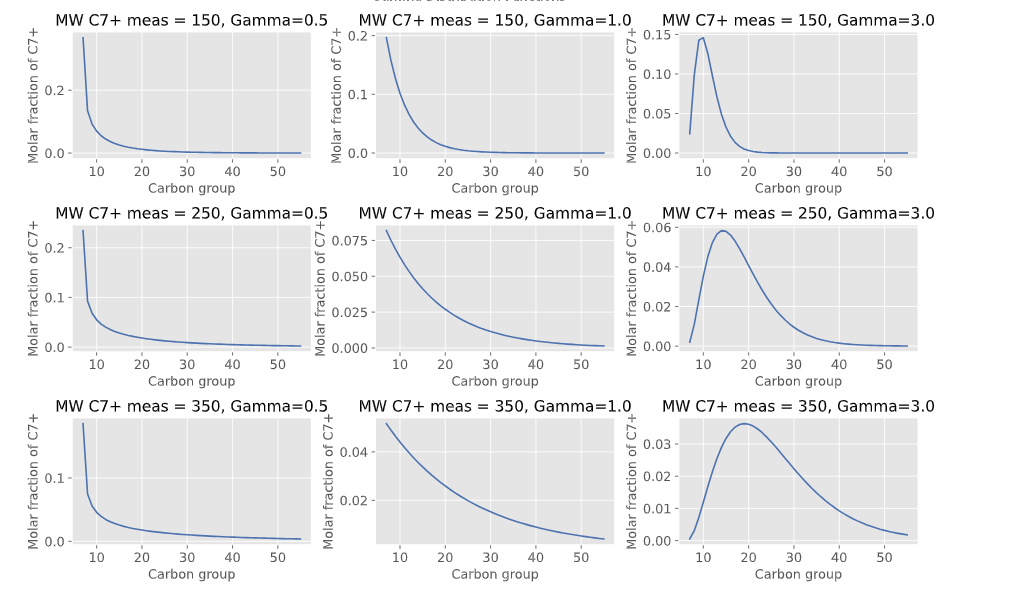


| 0                    | 1          | 2                  | 3                  | 4   | 5   | 6               |
|:---------------------|:-----------|:-------------------|:-------------------|:----|:----|:----------------|
|                      | total      | GAS                | OIL                |     |     |                 |
| CO2                  | 9.52381E-3 | 1.16346E-2         | 2.70388E-3         |     |     | [mole fraction] |
| methane              | 7.61905E-1 | 9.53373E-1         | 1.43279E-1         |     |     | [mole fraction] |
| ethane               | 9.52381E-3 | 1.11253E-2         | 4.34941E-3         |     |     | [mole fraction] |
| propane              | 9.52381E-3 | 9.87112E-3         | 8.40168E-3         |     |     | [mole fraction] |
| i-butane             | 4.7619E-3  | 4.18973E-3         | 6.61057E-3         |     |     | [mole fraction] |
| n-butane             | 4.7619E-3  | 3.9575E-3          | 7.36089E-3         |     |     | [mole fraction] |
| i-pentan

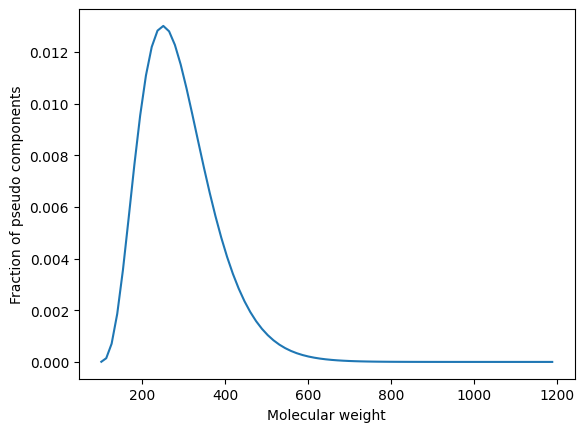

In [2]:
thermoSystem = jNeqSim.thermo.system.SystemSrkEos(298.0, 10.0)

thermoSystem.addComponent("CO2", 1.0)
thermoSystem.addComponent("methane", 80.0)
thermoSystem.addComponent("ethane", 1.0)
thermoSystem.addComponent("propane", 1.0)
thermoSystem.addComponent("i-butane", 0.5)
thermoSystem.addComponent("n-butane", 0.5)
thermoSystem.addComponent("i-pentane", 0.5)
thermoSystem.addComponent("n-pentane", 0.5)
thermoSystem.addPlusFraction("C6", 20, 290.0 / 1000.0, 0.82)
thermoSystem.getCharacterization().setPlusFractionModel("Whitson Gamma Model")
thermoSystem.getCharacterization().getPlusFractionModel().setGammaParameters(5.0, 90)
thermoSystem.getCharacterization().setLumpingModel("no lumping")
thermoSystem.getCharacterization().characterisePlusFraction()
thermoSystem.setMixingRule("classic")

thermoOps = jNeqSim.thermodynamicOperations.ThermodynamicOperations(thermoSystem)
thermoOps.TPflash()
thermoSystem.initPhysicalProperties()
## Plotting pseudo components vs molecular weight

components_list = [thermoSystem.getComponent(i).getName() for i in range(thermoSystem.getNumberOfComponents()) if i > 7]
fraction_list = [thermoSystem.getComponent(i).getz() for i in range(thermoSystem.getNumberOfComponents()) if i > 7]
MW_list = [thermoSystem.getComponent(i).getMolarMass()*1000 for i in range(thermoSystem.getNumberOfComponents()) if i > 7]

plt.plot(MW_list, fraction_list)
plt.ylabel("Fraction of pseudo components")
plt.xlabel("Molecular weight")

printFrame(thermoSystem)

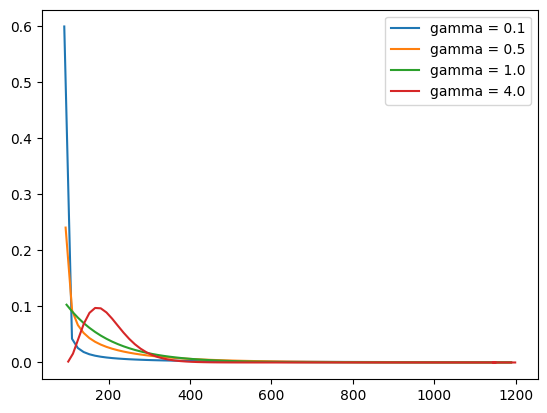

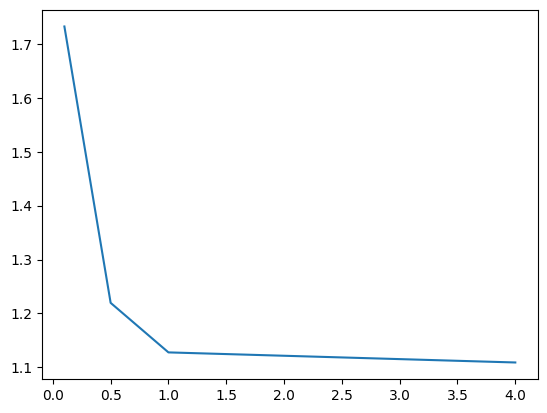

In [3]:
def run_sim(gamma, min_mw):
  thermoSystem = jNeqSim.thermo.system.SystemSrkEos(298.0, 10.0)

  thermoSystem.addComponent("CO2", 0.1)
  thermoSystem.addComponent("methane", 0.1)
  thermoSystem.addComponent("ethane", 0.001)
  thermoSystem.addComponent("propane", 1.0)
  thermoSystem.addComponent("i-butane", 0.5)
  thermoSystem.addComponent("n-butane", 0.5)
  thermoSystem.addComponent("i-pentane", 0.5)
  thermoSystem.addComponent("n-pentane", 0.5)
  thermoSystem.addPlusFraction("C6", 20, 200.0 / 1000.0, 1.02)
  thermoSystem.getCharacterization().setPlusFractionModel("Whitson Gamma Model")
  thermoSystem.getCharacterization().getPlusFractionModel().setGammaParameters(gamma, min_mw)
  thermoSystem.getCharacterization().setLumpingModel("no lumping")
  thermoSystem.getCharacterization().characterisePlusFraction()
  thermoSystem.setMixingRule("classic")

  thermoOps = jNeqSim.thermodynamicOperations.ThermodynamicOperations(thermoSystem)
  thermoOps.TPflash()
  thermoSystem.initPhysicalProperties()
  ## Plotting pseudo components vs molecular weight

  components_list = [thermoSystem.getComponent(i).getName() for i in range(thermoSystem.getNumberOfComponents()) if i > 7]
  fraction_list = [thermoSystem.getComponent(i).getz() for i in range(thermoSystem.getNumberOfComponents()) if i > 7]
  MW_list = [thermoSystem.getComponent(i).getMolarMass()*1000 for i in range(thermoSystem.getNumberOfComponents()) if i > 7]

  cstream = stream(thermoSystem)
  cstream.run()
  return MW_list, fraction_list, cstream.TVP(20, "C")

TVPs = []
gammas = []
gamma = 0.1
MW_list,  fraction_list, TVP =  run_sim(gamma, 90)
gammas.append(gamma)
TVPs.append(TVP)
plt.plot(MW_list, fraction_list, label = f"gamma = {gamma}")

gamma = 0.5
MW_list,  fraction_list, TVP =  run_sim(gamma, 90)
gammas.append(gamma)
TVPs.append(TVP)
plt.plot(MW_list, fraction_list, label = f"gamma = {gamma}")

gamma = 1.0
MW_list,  fraction_list, TVP =  run_sim(gamma, 90)
gammas.append(gamma)
TVPs.append(TVP)
plt.plot(MW_list, fraction_list, label = f"gamma = {gamma}")

gamma = 4.0
MW_list,  fraction_list, TVP =  run_sim(gamma, 90)
gammas.append(gamma)
TVPs.append(TVP)
plt.plot(MW_list, fraction_list, label = f"gamma = {gamma}")

plt.legend()
plt.show()

plt.plot(gammas, TVPs)
plt.show()